# Value Functions
- Creation of enhanced value functions for VFT Tool

# S Curve
- Using the Sigmoid Function:  $ S(t) = 1/(1-e^{-t})$
- Input Low, High and Flip


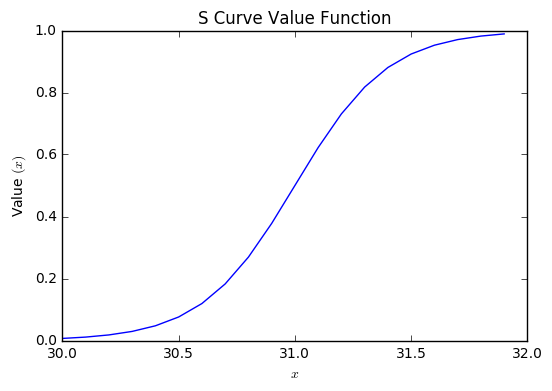

In [8]:
# Plot Sigmoid Function
# The logistic function looks like an elongated S
# Also consider generalised logistic function 

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

####################
# Input Values Here:
low = 30 
scale = 2
flip = 0                    # Flip = 1 to reverse curve
###################


# Define the Sigmoid Function
def sigmoid(t):                         
    return (1/(1 + np.e**(-t))) 

plot_range = np.arange(-5, 5, 0.5) #evenly spaced values within a  interval: [start, stop), interval
y_values = sigmoid(plot_range)

# Plot curve
if flip == 0:
    plt.plot((plot_range*scale/10)+(.5*scale)+low, y_values, color="blue")
else:
    plt.plot((plot_range*scale/10)+(.5*scale)+low, 1-y_values, color="red")

plt.title('S Curve Value Function')
plt.xlabel('$x$')
plt.ylabel('Value $(x)$')
plt.show()

# new_plot_range = ((plot_range*scale/10)+(.5*scale)+low)   # new plot range
# old_plot_range = (10*(new_plot_range -(.5*scale)-low))/scale      # old plot range

# Exponential Curve
- Input Low, High and Rho
- Using normalized exponential function:  $F(t)=(1-e^{-(x-low)/rho})/(1-e^{-(high-low)/rho})$

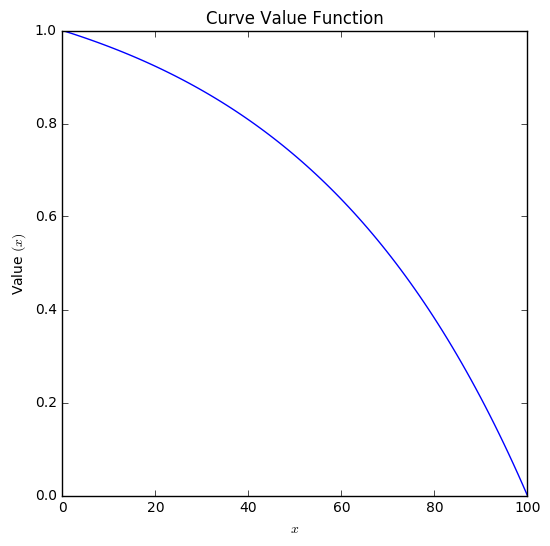

In [2]:
# Plot Exponential Function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

####################
# Input Values Here:
low = 100.0                        # important to keep input a float
high = 0.0                     # important to keep input a float
rho = -50
# Simply switch value inputs for low and high for the inverse function
###################
increment = 100

# Define the Exponential Function
x = np.linspace(low, high, increment)
y = (1 - np.exp(-(x - low)/rho))/(1 - np.exp(-(high - low)/rho))

# Plot curve
plt.figure(figsize=(6,6))
plt.plot(x, y,'b-') 
plt.title('Curve Value Function')
plt.xlabel('$x$')
plt.ylabel('Value $(x)$')
plt.show()

# Piecewise Linear Function
- Enter Midpoint (x,y) coordinate
- Enter Endpoint (x) coordinate

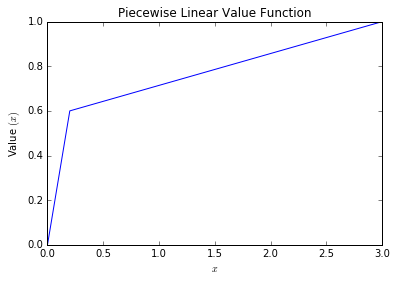

In [62]:
# Plot Piecewise Linear Function
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
# Origin
x1 = 0
y1 = 0

####################
# Input Coordinates:
x2 = .2      # Midpoint x coordinate
y2 = .6      # Midpoint y coordinate
x3 = 3       # Endpoint x coordinate
###################

y3 = 1

plt.plot([x1,x2,x3],[y1,y2,y3],'b-')
plt.title('Piecewise Linear Value Function')
plt.xlabel('$x$')
plt.ylabel('Value $(x)$')
plt.show()

# Curve Fitting
- Input coordinates and use polynomial fit

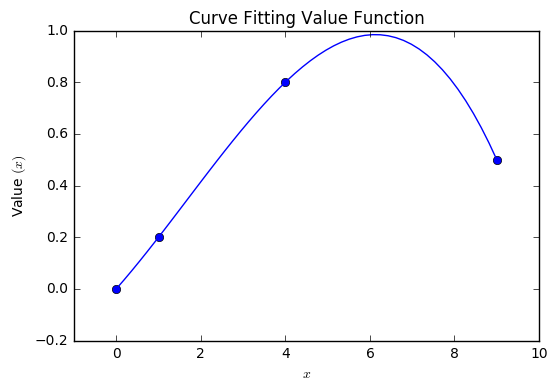

In [5]:
import numpy as np
import matplotlib.pyplot as plt

####################
# Input Coordinates:
points = np.array([(0, 0), (1, .2), (4, .8), (9, .5)])
####################

# get x and y vectors
x = points[:,0]
y = points[:,1]

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

plt.plot(x,y,'o', x_new, y_new,'b-')
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.title('Curve Fitting Value Function')
plt.xlabel('$x$')
plt.ylabel('Value $(x)$')
plt.show()

# Non Linear Least Squares Fit for Exponential 

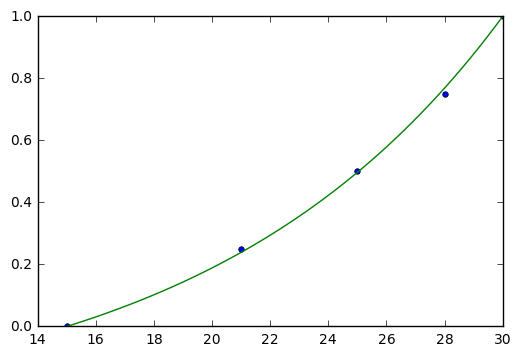

In [4]:
# https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.curve_fit.html
# Use non-linear least squares to fit a function, f, to data.

%matplotlib inline

import numpy as np
import scipy.optimize as optimization
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def func(x, gamma):
    return (1-np.exp(-gamma*(x-xlow)))/(1-np.exp(-gamma*(xhigh-xlow)))

# Input Inital Metrics 
xlow = 15.0
x2 = 21.0
xmid = 25.0
x4 = 28.0
xhigh = 30.0

# Create Intital Data Array
xdata = np.array([xlow, x2, xmid, x4, xhigh])
ydata = np.linspace(0, 1, 5)

# Starting Guess for Gamma Parameter
gamma0 = 0.1

# Use non-linear least squares to fit a function to data.
optcalc = optimization.curve_fit(func, xdata, ydata, gamma0)
# Grab Optimal Value for Gamma 
gammaBest = optcalc[0]
    
plt.plot(xdata, ydata, 'o', markersize=4, label='data')
xline = np.linspace(xlow, xhigh, 100)
fitdata = func(xline, gammaBest)  
plt.plot(xline, fitdata)
plt.show()